In [1]:
import urllib.request, urllib.parse, urllib.error
import ssl
import json
import nltk
import re
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Extracting first text
site1 = 'http://www.gutenberg.org/files/63365/63365-0.txt'
print('Extracting ',site1)
uh1 = urllib.request.urlopen(site1)
data1 = uh1.read().decode('utf8')

Extracting  http://www.gutenberg.org/files/63365/63365-0.txt


In [3]:
# Extracting second text
site2 = 'http://www.gutenberg.org/files/63369/63369-0.txt'
print('Extracting ',site2)
uh2 = urllib.request.urlopen(site2)
data2 = uh2.read().decode('utf8')

Extracting  http://www.gutenberg.org/files/63369/63369-0.txt


In [4]:
# pre-processing
data1 = re.sub('^Section [1-9].', '', data1)
data1 = re.sub(r'==.*?==+', '', data1)
data1 = re.sub('[\(\[].*?[\)\]]', '', data1)
data1 = re.sub(r'[^a-zA-Z0-9\s]', '', data1)
data1 = data1.replace('\n', '')

In [5]:
data2 = re.sub('^Section [1-9].', '', data2)
data2 = re.sub(r'==.*?==+', '', data2)
data2 = re.sub('[\(\[].*?[\)\]]', '', data2)
data2 = re.sub(r'[^a-zA-Z0-9\s]', '', data2)
data2 = data2.replace('\n', '')

In [6]:
print(data1)

subscribe to our email newsletter to hear about new eBooks


In [7]:
token1 = nltk.word_tokenize(data1)



In [8]:
token2 = nltk.word_tokenize(data2)

In [9]:
print(type(data2))

<class 'str'>


In [10]:
fdist1 = FreqDist(token1)
fdist2 = FreqDist(token2)

In [11]:
print(fdist1)

<FreqDist with 7039 samples and 64611 outcomes>


In [12]:
fig = plt.figure(figsize=(40, 30))

<Figure size 2880x2160 with 0 Axes>

In [13]:
fdist1.plot(20)


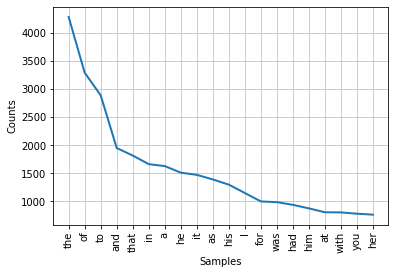

In [14]:
fdist2.plot(20)

In [15]:
print(token1[:10])

['Project', 'Gutenbergs', 'The', 'Flying', 'Boys', 'to', 'the', 'Rescue', 'by', 'Edward']


In [16]:
from wordcloud import WordCloud, STOPWORDS

In [17]:
wordcloud1 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', stopwords = [], collocations=False).generate(data1)

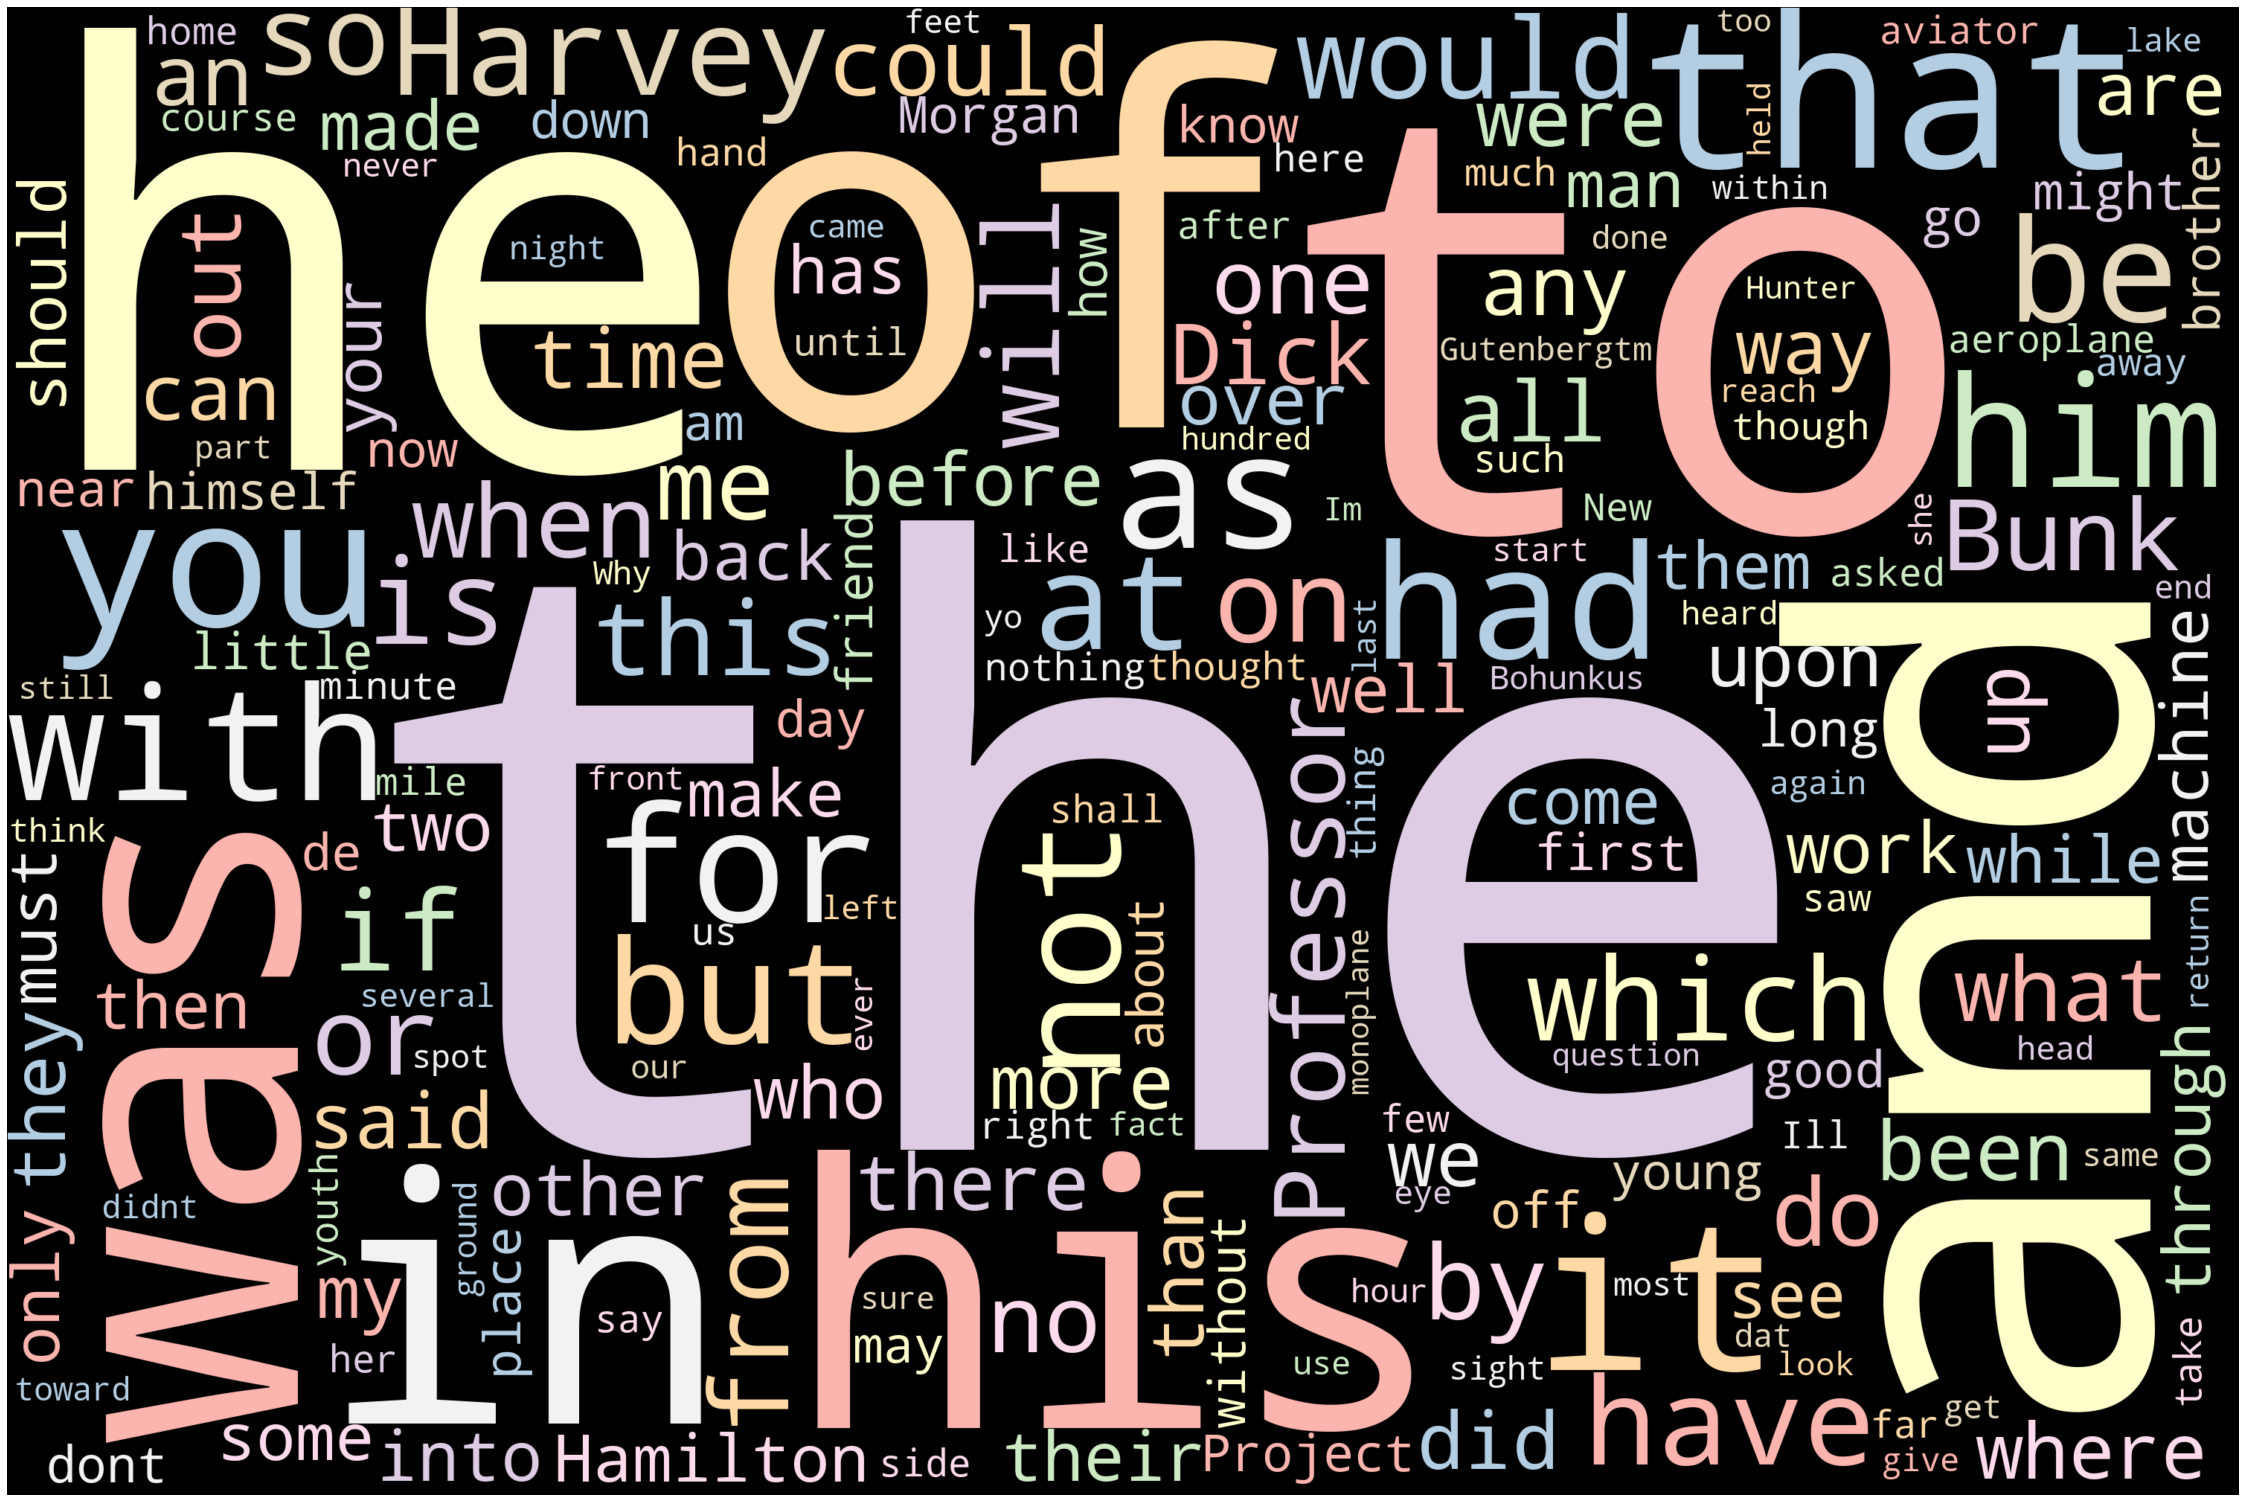

In [18]:
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud1, interpolation = 'bilinear') 
# No axis details
plt.axis("off");

In [19]:
wordcloud2 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', stopwords = [], collocations=False).generate(data2)

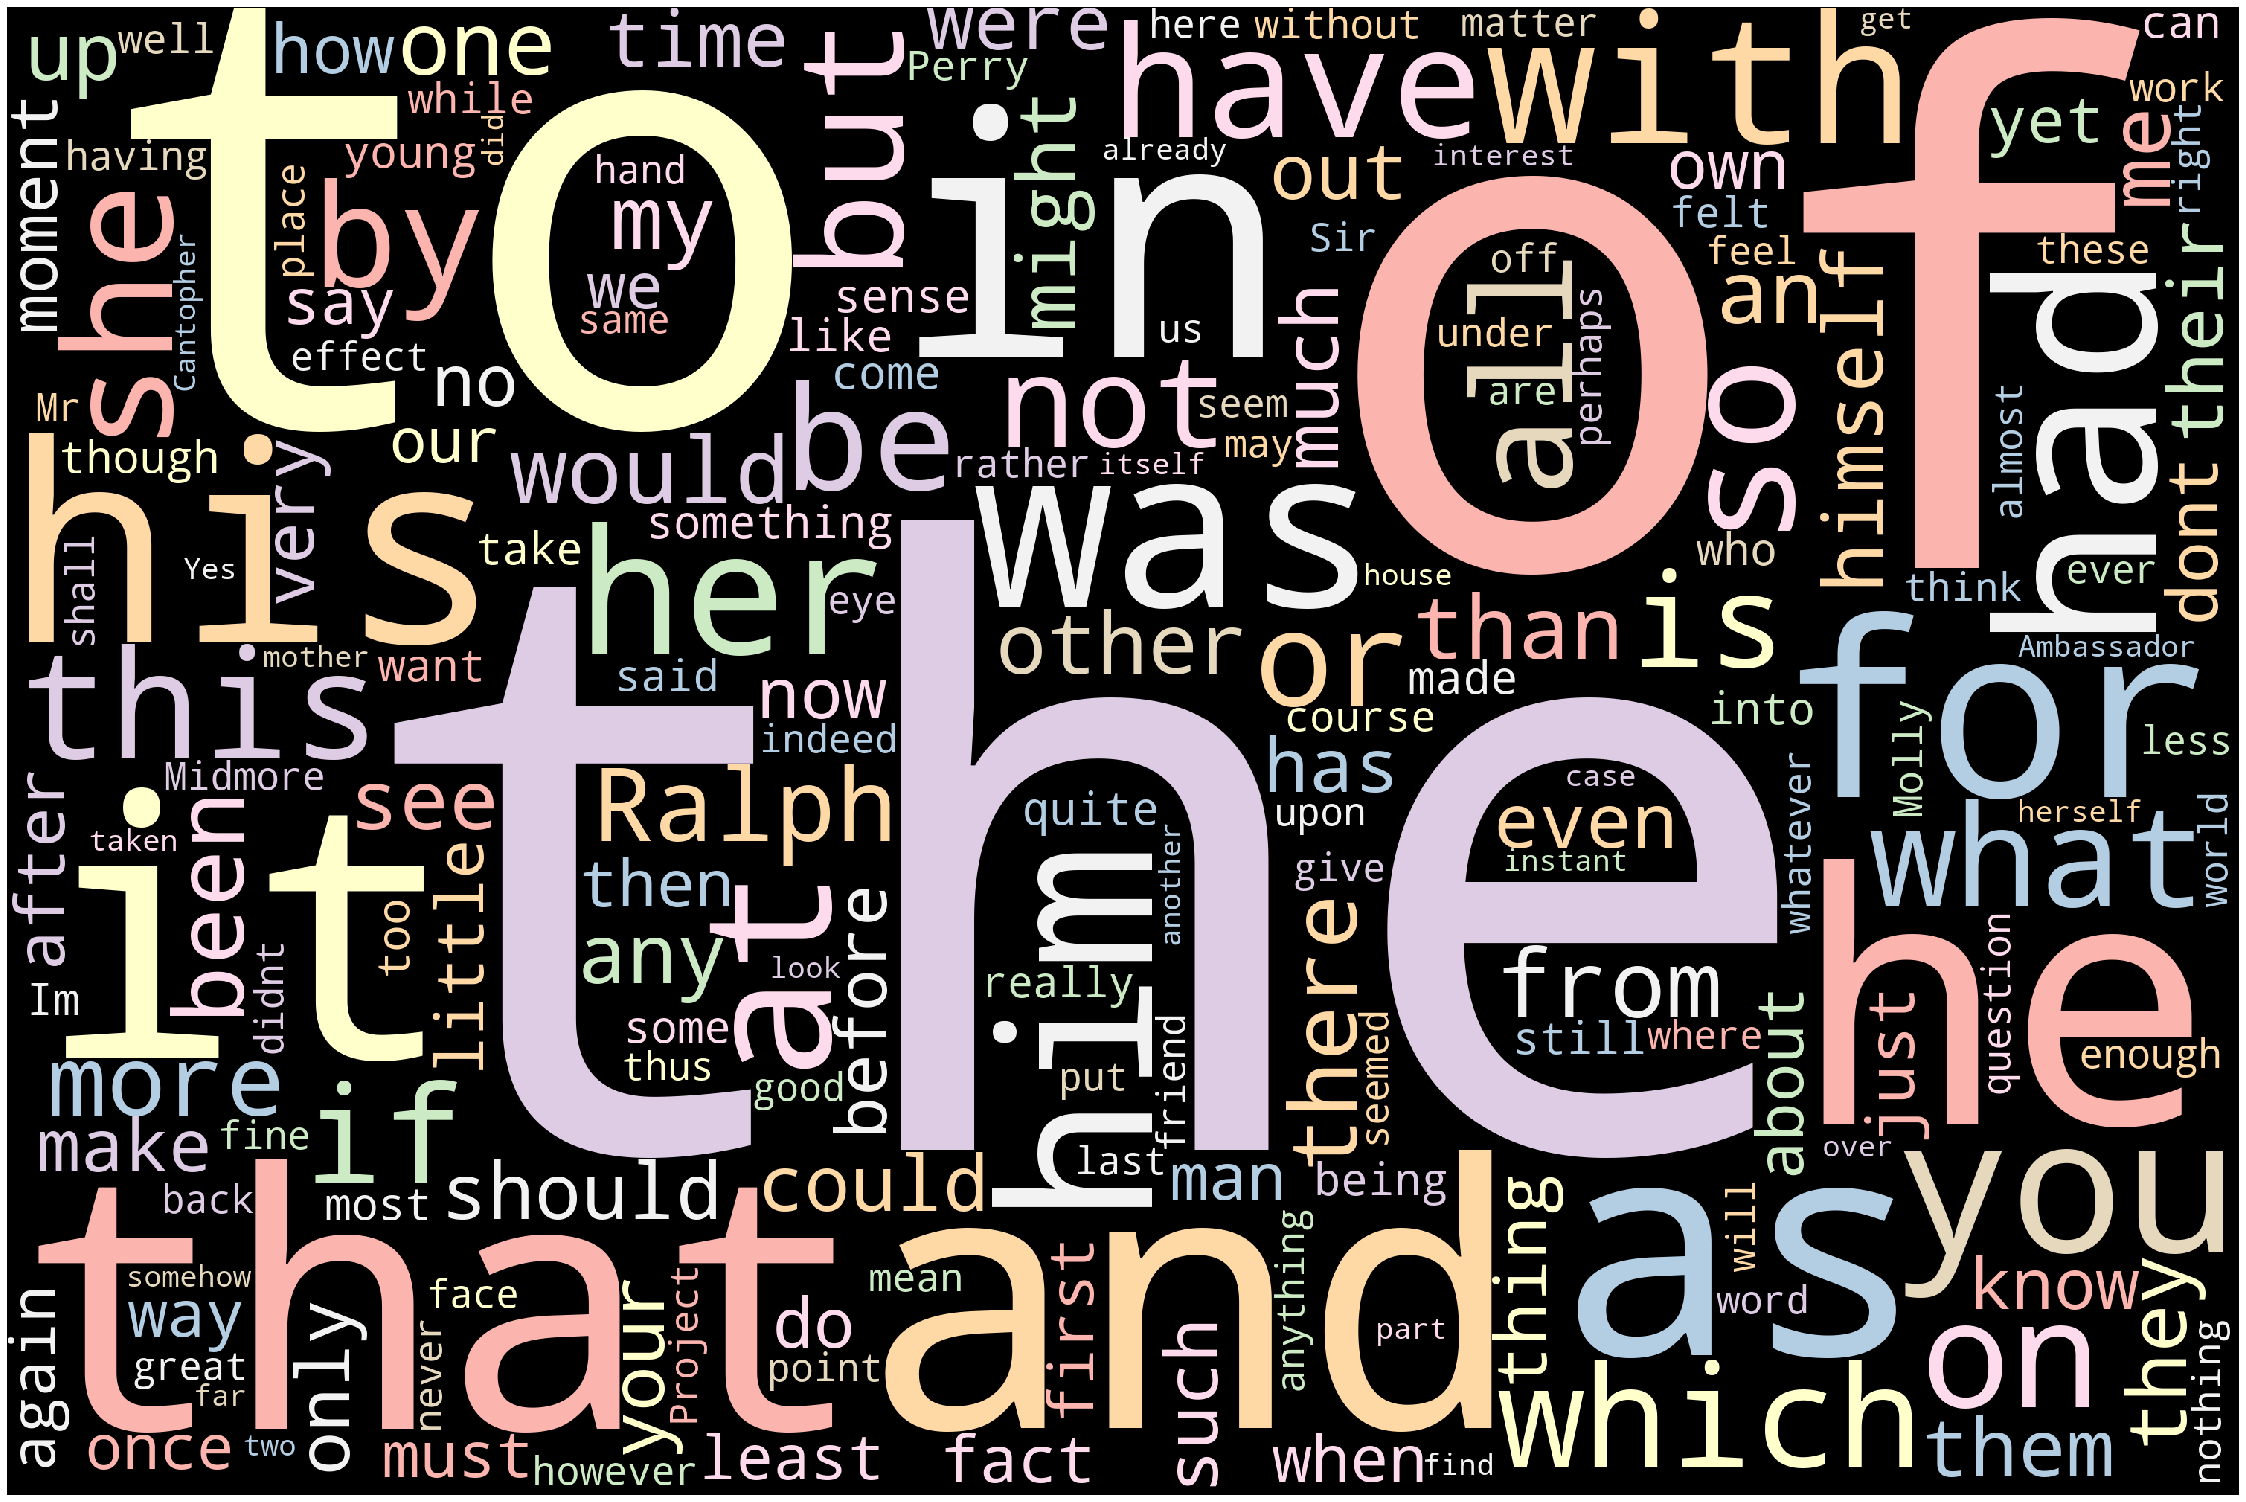

In [20]:
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud2) 
# No axis details
plt.axis("off");

In [21]:
from nltk.corpus import stopwords 

In [22]:
stop_words = set(stopwords.words('english'))

In [23]:
sp1 = [] 
for w in token1:
    if w in stop_words: 
        sp1.append(w) 
  

In [24]:
sp2 = [] 
for w in token2:
    if w in stop_words: 
        sp2.append(w) 
  

In [25]:
modified_wordcloud2 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', stopwords = sp2, collocations = False).generate(data2)

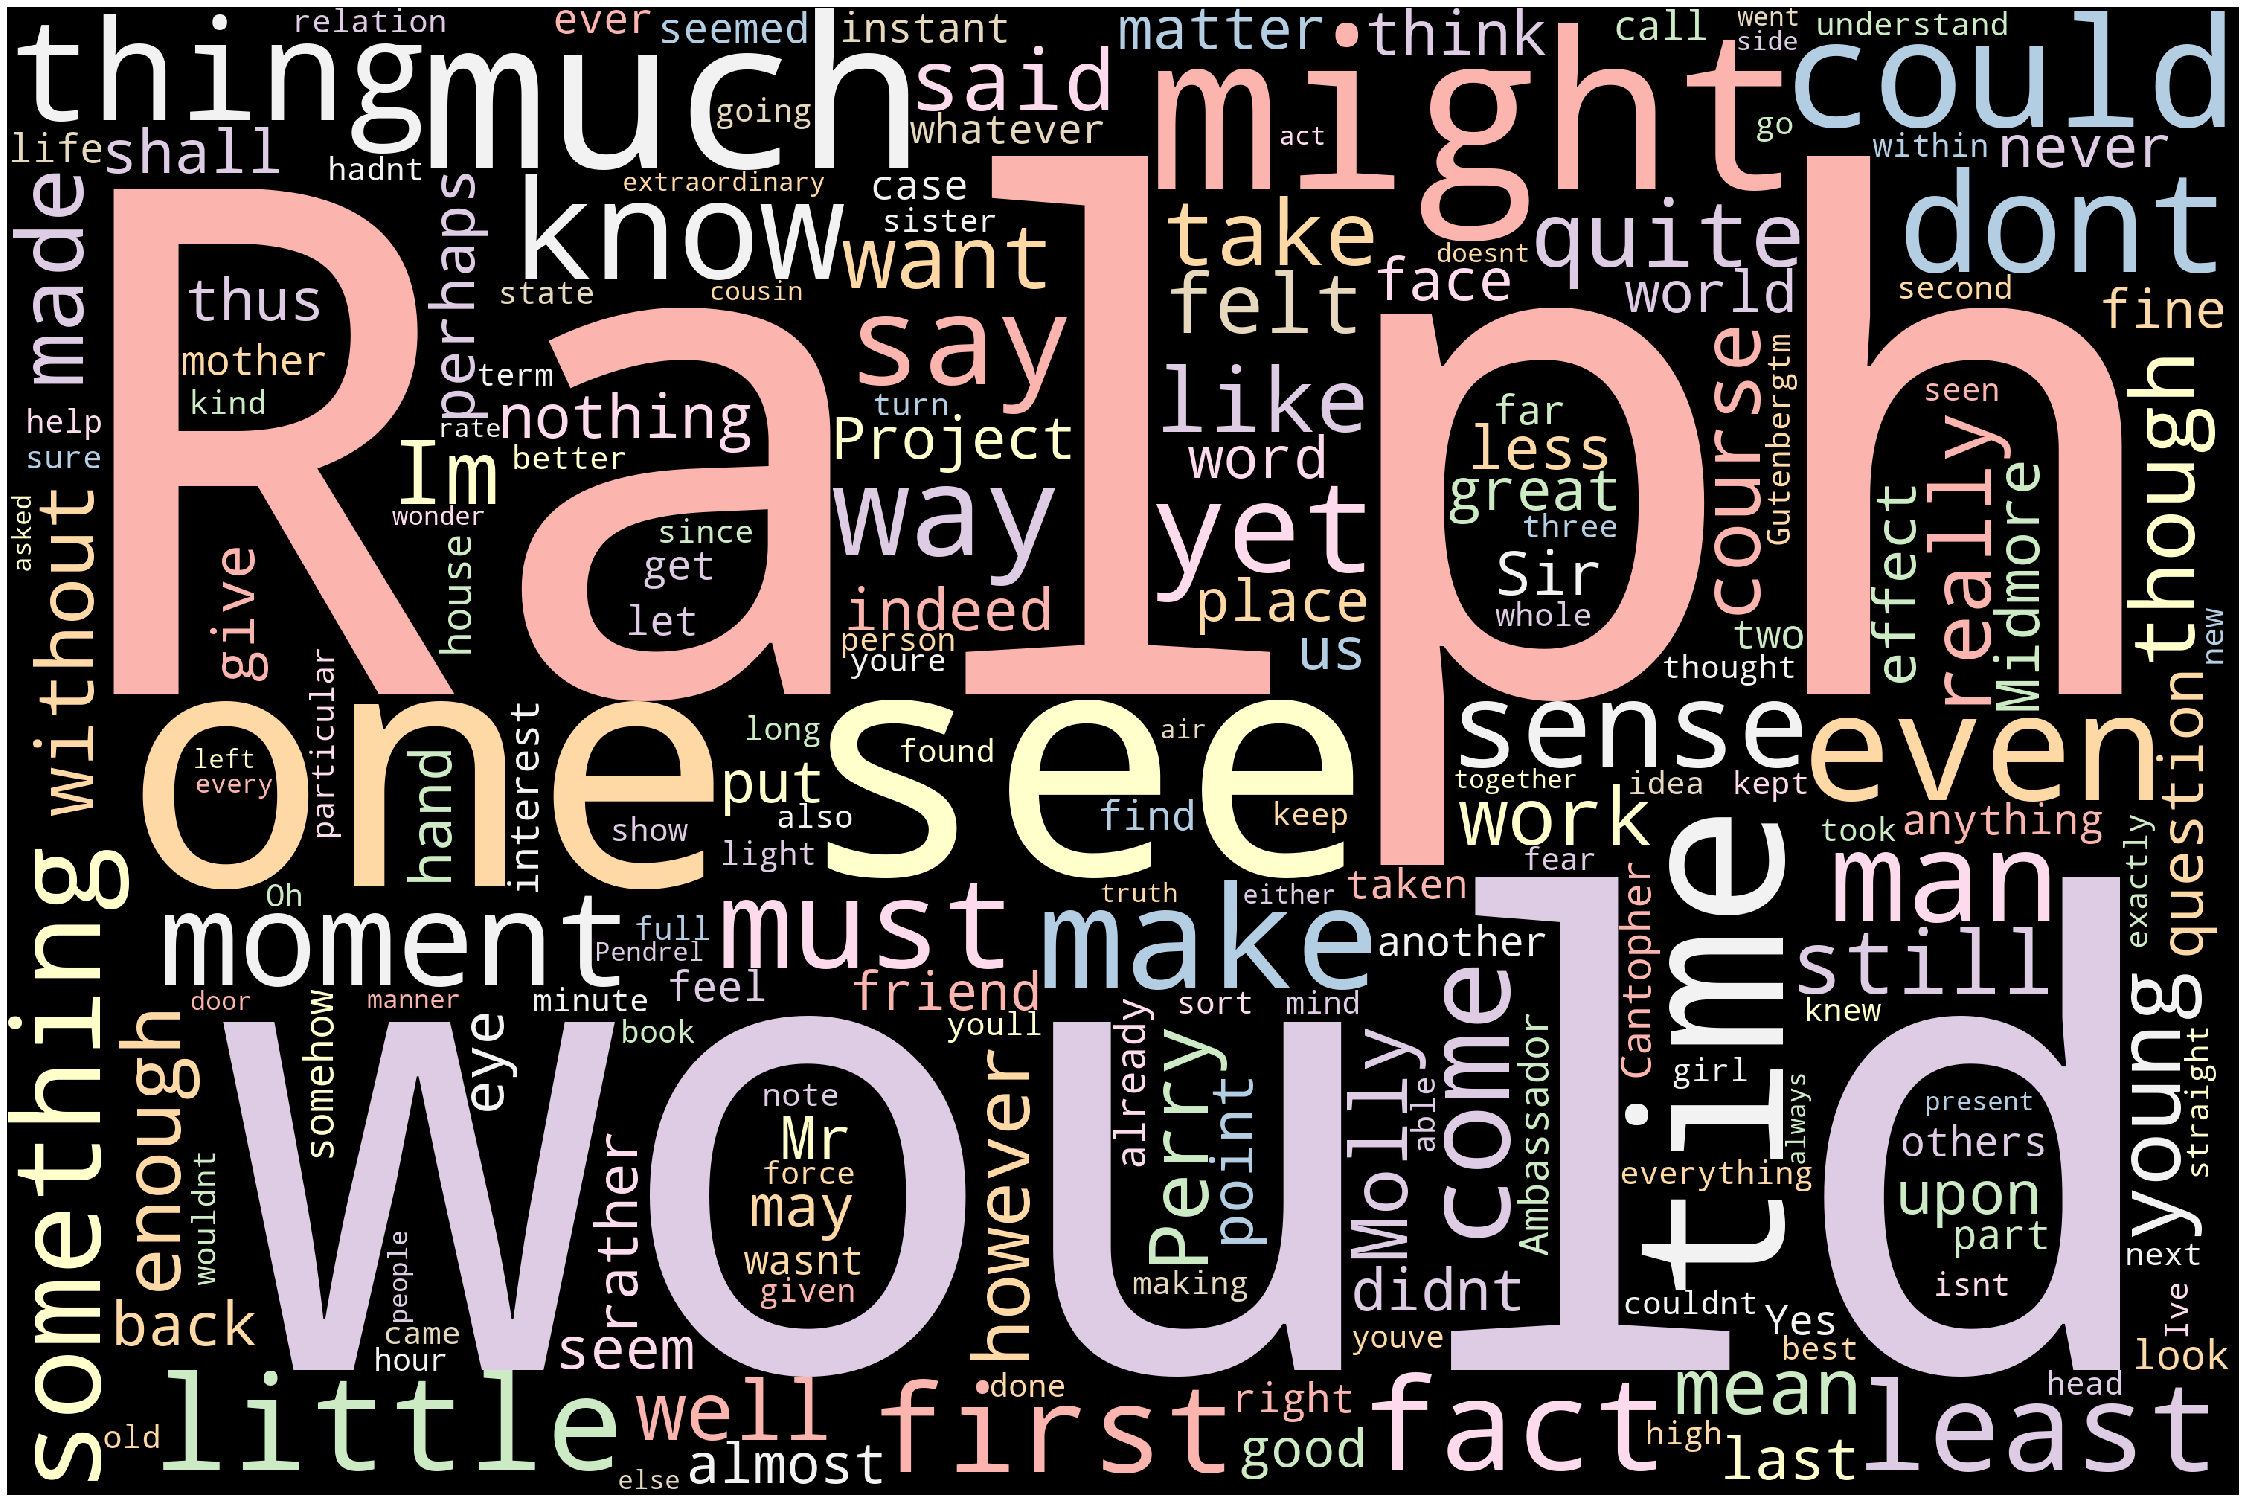

In [26]:
plt.figure(figsize=(40, 30))
plt.imshow(modified_wordcloud2) 
# No axis details
plt.axis("off");

In [27]:
modified_wordcloud1 = WordCloud(width = 3000, height = 2000, random_state=1, background_color='black', colormap='Pastel1', stopwords = sp1, collocations = False).generate(data1)

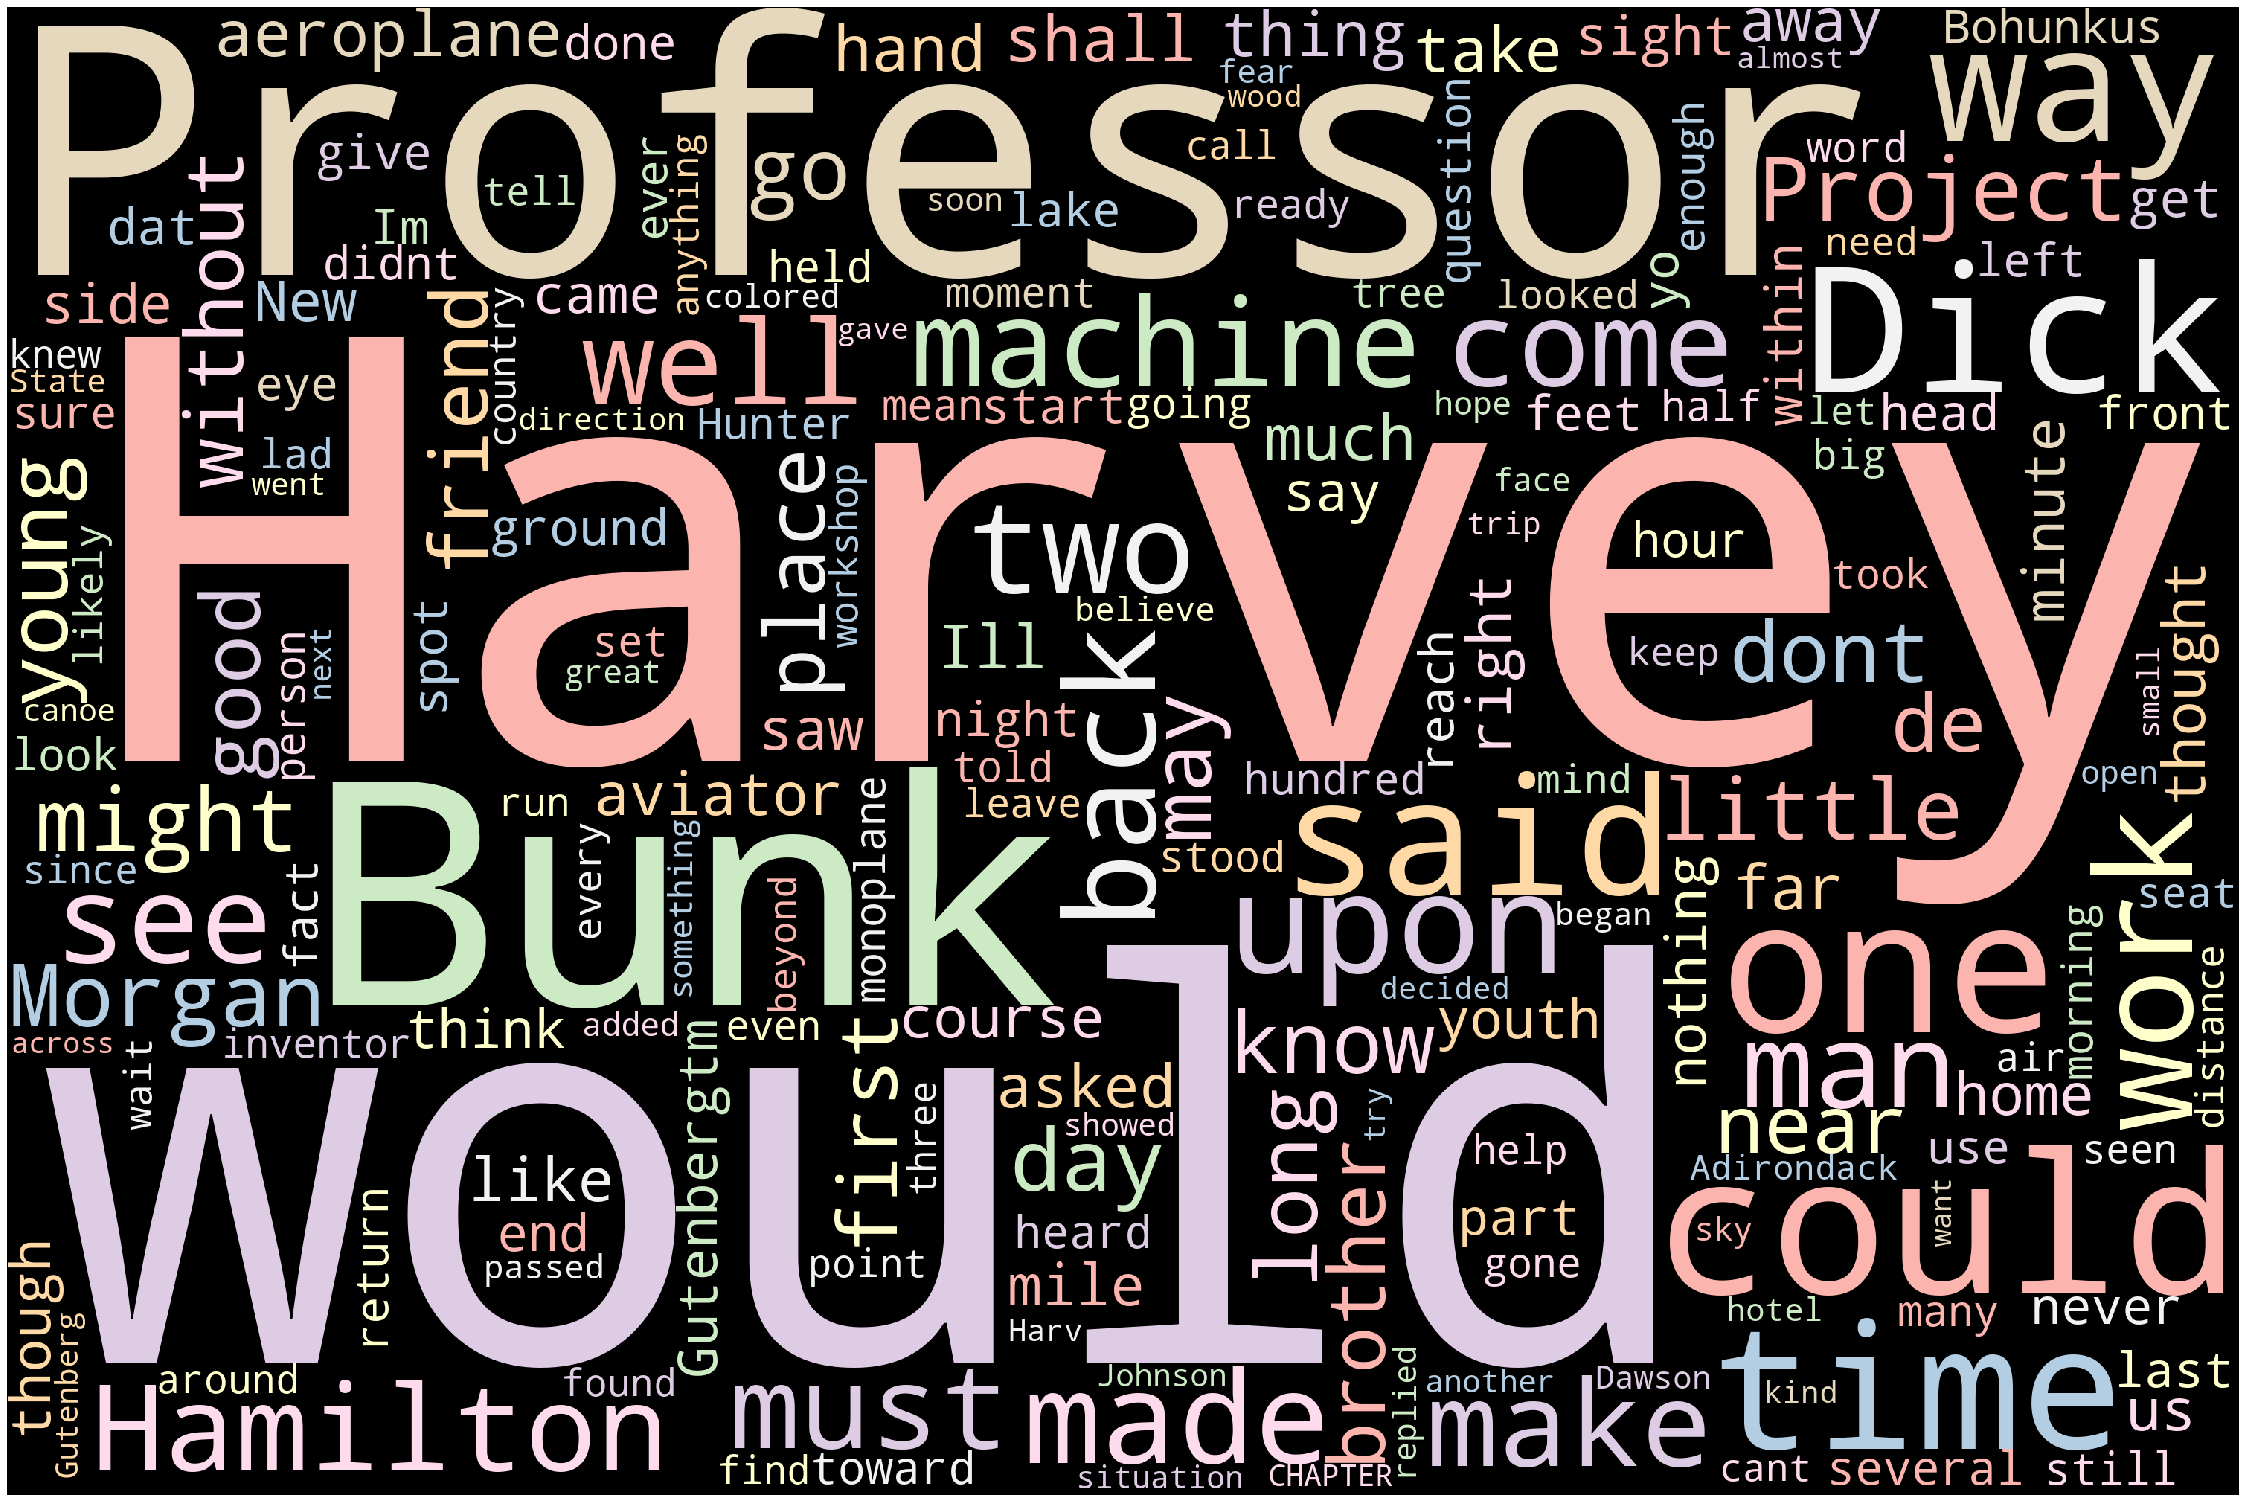

In [28]:
plt.figure(figsize=(40, 30))
plt.imshow(modified_wordcloud1) 
# No axis details
plt.axis("off");

In [29]:
#POS Tagging
word_list1 = [w for w in token1 if not w in sp1]  
word_list2 = [w for w in token2 if not w in sp2] 

In [30]:
tagged1 = nltk.pos_tag(word_list1)

In [31]:
tagged2 = nltk.pos_tag(word_list2)

In [32]:
print(tagged1[:20])

[('Project', 'NN'), ('Gutenbergs', 'NNP'), ('The', 'DT'), ('Flying', 'NNP'), ('Boys', 'NNP'), ('Rescue', 'NNP'), ('Edward', 'NNP'), ('S', 'NNP'), ('Ellis', 'NNP'), ('This', 'DT'), ('eBook', 'NN'), ('use', 'NN'), ('anyone', 'NN'), ('anywhere', 'RB'), ('cost', 'VBZ'), ('almost', 'RB'), ('restrictions', 'NNS'), ('whatsoever', 'IN'), ('You', 'PRP'), ('may', 'MD')]


In [33]:
print(tagged2[:20])

[('The', 'DT'), ('Project', 'NNP'), ('Gutenberg', 'NNP'), ('EBook', 'NNP'), ('The', 'DT'), ('Sense', 'NNP'), ('Past', 'NNP'), ('Henry', 'NNP'), ('James', 'NNP'), ('This', 'DT'), ('eBook', 'NN'), ('use', 'NN'), ('anyone', 'NN'), ('anywhere', 'RB'), ('cost', 'VBZ'), ('almost', 'RB'), ('restrictions', 'NNS'), ('whatsoever', 'IN'), ('You', 'PRP'), ('may', 'MD')]
